In [2]:
import cv2 
import os 
from glob import glob 
import matplotlib.pyplot as plt
img_paths=[img_path for img_path in glob(os.path.join(os.getcwd(),"resources","*.png"))]
print(img_paths)
for img_path in img_paths:
    img=cv2.imread(img_path)
    print(img.shape)
    h,w,d=img.shape
    if h!=614 and w!=1024:
        img=cv2.resize(img,(1024,614))
        cv2.imwrite(img_path,img)

['/home/ansary/WORK/Work/EBLICT/eblict-nid-data-repo/resources/smart_back.png', '/home/ansary/WORK/Work/EBLICT/eblict-nid-data-repo/resources/nid_back.png', '/home/ansary/WORK/Work/EBLICT/eblict-nid-data-repo/resources/nid_front.png', '/home/ansary/WORK/Work/EBLICT/eblict-nid-data-repo/resources/smart_front.png']
(614, 1024, 3)
(614, 1024, 3)
(614, 1024, 3)
(614, 1024, 3)


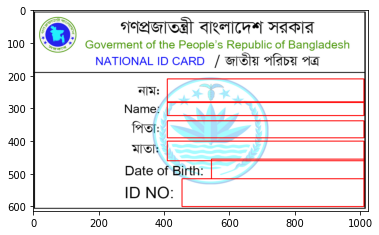

In [3]:
from dataLib.card import card
img='/home/ansary/WORK/Work/EBLICT/eblict-nid-data-repo/resources/nid_front.png'
img=cv2.imread(img)
att=card.nid.front
for k,v in att.text.items():
    xmin,ymin,xmax,ymax=v["location"]
    img=cv2.rectangle(img,(xmin,ymin),(xmax,ymax),color=(255,0,0),thickness=2)
plt.imshow(img)

In [4]:
import json 
with open(os.path.join("/home/ansary/WORK/Work/EBLICT/eblict-nid-data-repo/resources/dict.json")) as f:
    json_data       =   json.load(f)
    lang_dict       =   json_data["language"]
    bangla     =   lang_dict["bangla"]
    english    =   lang_dict["english"]


In [5]:
bangla.keys()

dict_keys(['graphemes', 'numbers', 'punctuations'])

In [6]:
json_data.keys()

dict_keys(['language', 'vocab'])

In [7]:
lang_dict.keys()

dict_keys(['bangla', 'english'])

In [8]:
import pandas as pd 
df=pd.read_csv("/home/ansary/WORK/Work/EBLICT/eblict-nid-data-repo/resources/bangla.csv")
df

,grapheme
0,ং
1,ঃ
2,অ
3,অঁ
4,অ্যা
...,...
3682,৫
3683,৬
3684,৭
3685,৮


In [9]:
df.iloc[3678,0]

'১'

In [10]:
df=df[0:3677]
df

,grapheme
0,ং
1,ঃ
2,অ
3,অঁ
4,অ্যা
...,...
3672,য়েঁ
3673,য়ৈ
3674,য়ো
3675,য়োঁ


In [11]:
grapehmes=sorted(df.grapheme.tolist())
lang_dict["bangla"]['graphemes']=grapehmes


In [12]:
with open("dict.json", 'w') as fp:
    json.dump(lang_dict, fp,sort_keys=True, indent=4,ensure_ascii=False)
